# Data Cleaning

In [71]:
import numpy as np
import pandas as pd

In [72]:
airbnb_dataset = pd.read_csv(r"D:\renat\Documents\Data Science Projects\Regression\AB_NYC_2019.csv")

In [73]:
print(airbnb_dataset.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [74]:
missing_values_count = airbnb_dataset.isnull().sum()
print(missing_values_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [75]:
print(airbnb_dataset['price'])

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64


In [76]:
total_cells = np.product(airbnb_dataset.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100

print("There are ", total_cells, "cells in total")
print("There are ", total_missing, "missing cells")
print("The percentage missing is ", percent_missing)

There are  782320 cells in total
There are  20141 missing cells
The percentage missing is  2.574521934758155


In [77]:
airbnb_dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [78]:
airbnb_dataset_2 = airbnb_dataset.drop(["id", "host_name", "latitude", "longitude", "last_review", "host_id", "availability_365", "calculated_host_listings_count"], axis=1)
airbnb_dataset_2.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month'],
      dtype='object')

In [79]:
print("Columns in original dataset:  \n", airbnb_dataset.shape[1])
print("Total columns after dropped:  \n", airbnb_dataset_2.shape[1])

Columns in original dataset:  
 16
Total columns after dropped:  
 8


In [80]:
missing_values_count = airbnb_dataset_2.isnull().sum()
print(missing_values_count)

name                      16
neighbourhood_group        0
neighbourhood              0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
dtype: int64


In [81]:
airbnb_dataset_2 = airbnb_dataset_2[airbnb_dataset_2['name'].notna()]
print(airbnb_dataset_2["name"])
print(airbnb_dataset_2["name"].isnull())
print(airbnb_dataset_2["name"].isnull().sum())

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48879, dtype: object
0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Name: name, Length: 48879, dtype: bool
0


In [82]:
print(airbnb_dataset_2["reviews_per_month"])
print(airbnb_dataset_2["reviews_per_month"].isnull())
print(airbnb_dataset_2["reviews_per_month"].isnull().sum())

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48879, dtype: float64
0        False
1        False
2         True
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Name: reviews_per_month, Length: 48879, dtype: bool
10042


In [83]:
airbnb_dataset_2['reviews_per_month'] = airbnb_dataset_2['reviews_per_month'].replace('[^0-9\.]', '', regex=True)
airbnb_dataset_2['reviews_per_month'] = pd.to_numeric(airbnb_dataset_2['reviews_per_month'], errors='coerce')
print(airbnb_dataset['reviews_per_month'])
median_reviews = airbnb_dataset_2['reviews_per_month'].median()
airbnb_dataset_2['reviews_per_month'].fillna(median_reviews, inplace=True)
print("Number of null values in 'reviews per month':", airbnb_dataset_2['reviews_per_month'].isnull().sum())

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64
Number of null values in 'reviews per month': 0


In [84]:
rows_number = airbnb_dataset_2.shape[0]
print(rows_number)

48879


In [85]:
print(airbnb_dataset_2.isnull().sum())

name                   0
neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
dtype: int64


# EDA

Histograms' prices

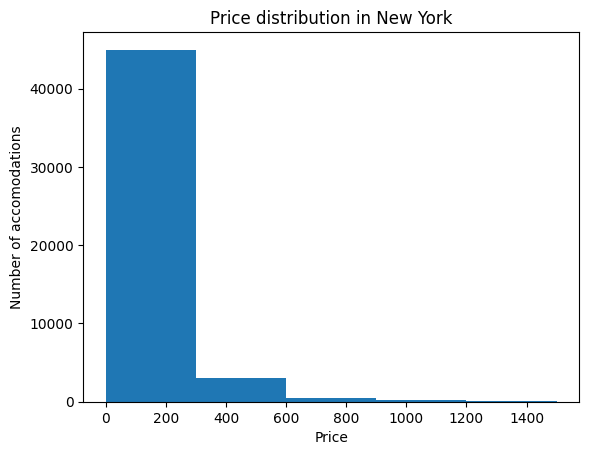

In [86]:
import matplotlib.pyplot as plt

# set bin range and count
bin_range = (0, 1500)
bin_count = 5

# Create a prices histogram
plt.hist(airbnb_dataset_2["price"], bins=bin_count, range=bin_range)
plt.title("Price distribution in New York")
plt.xlabel("Price")
plt.ylabel("Number of accomodations")
plt.show()



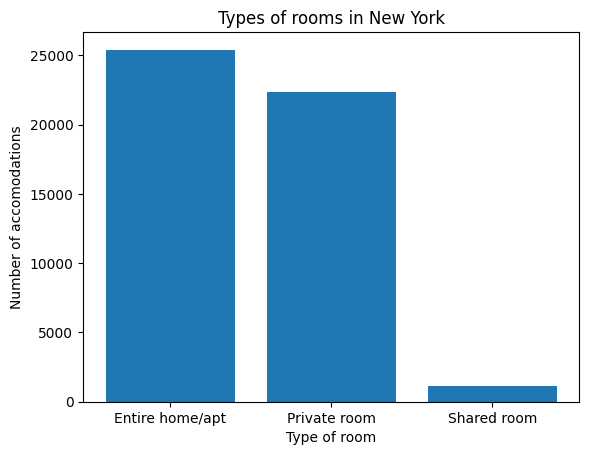

In [87]:
# Calculate the quantity of accomodations by type of rooms
room_type_counts = airbnb_dataset_2["room_type"].value_counts()

# Create a bar plot of room types
plt.bar(room_type_counts.index, room_type_counts.values)
plt.title("Types of rooms in New York")
plt.xlabel("Type of room")
plt.ylabel("Number of accomodations")
plt.show()


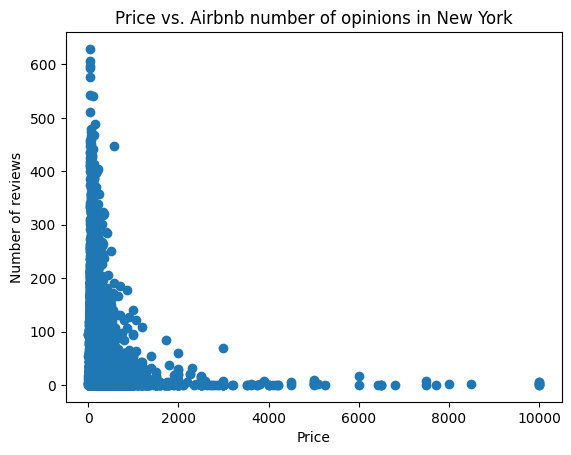

In [88]:
# Create a dispersion diagram of price and number of reviews
plt.scatter(airbnb_dataset_2["price"], airbnb_dataset_2["number_of_reviews"])
plt.title("Price vs. Airbnb number of opinions in New York")
plt.xlabel("Price")
plt.ylabel("Number of reviews")
plt.show()

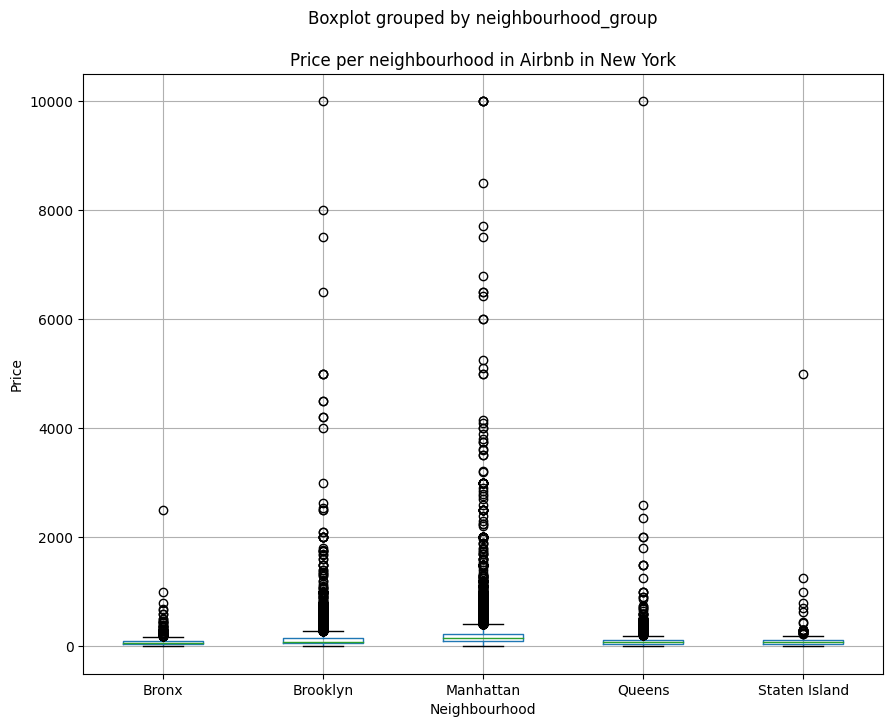

In [89]:
# Create a box plot of prices by neighborhood
airbnb_dataset_2.boxplot(column="price", by="neighbourhood_group", figsize=(10,8))
plt.title("Price per neighbourhood in Airbnb in New York")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.show()

# Predictions and Feature Engineering

In [90]:
nulls = airbnb_dataset_2.isnull().sum()
print(nulls)

name                   0
neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
dtype: int64


In [91]:
# Get unique values of column "neighbourhood"
neighbourhoods = airbnb_dataset_2['neighbourhood'].unique()

# Print unique values
print(neighbourhoods)

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [92]:
# Calculate mean of target variable to each unique value in column "name"
name_means = airbnb_dataset_2.groupby('name')['price'].mean()

# Code each unique value in column name with its mean of the target variable
airbnb_dataset_2['name_encoded'] = airbnb_dataset_2['name'].map(name_means)

# Calculate mean of target variable to each unique value in column "neighbourhood"
neighbourhood_means = airbnb_dataset_2.groupby('neighbourhood')['price'].mean()

# Code each unique value in column neighbourhood with its mean of the target variable
airbnb_dataset_2['neighbourhood_encoded'] = airbnb_dataset_2['neighbourhood'].map(neighbourhood_means)

# Perform One-Hot Encoding in column "neighbourhood_group"
airbnb_dataset_2_neighbourhood_group = pd.get_dummies(airbnb_dataset_2['neighbourhood_group'], prefix='neighbourhood_group')

# Perform One-Hot Encoding in la column "room_type"
airbnb_dataset_2_room_type = pd.get_dummies(airbnb_dataset_2['room_type'], prefix='room_type')

# Concatenate the dataframes with the original dataset
airbnb_dataset_2_encoded = pd.concat([airbnb_dataset_2, airbnb_dataset_2_neighbourhood_group, airbnb_dataset_2_room_type], axis=1)

# Remove original columns "neighbourhood_group" and "room_type"
airbnb_dataset_2_encoded.drop(['neighbourhood_group', 'room_type'], axis=1, inplace=True)

# Save updated dataset in a csv file
airbnb_dataset_2_encoded.to_csv('airbnb_dataset_final.csv', index=False)


In [93]:
print(airbnb_dataset_2_encoded.columns)


Index(['name', 'neighbourhood', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'name_encoded', 'neighbourhood_encoded',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


Correlation within variables:
                                      price  minimum_nights  \
price                              1.000000        0.042810   
minimum_nights                     0.042810        1.000000   
number_of_reviews                 -0.047963       -0.081613   
reviews_per_month                 -0.036816       -0.112299   
name_encoded                       0.998868        0.041799   
neighbourhood_encoded              0.259354        0.084494   
neighbourhood_group_Bronx         -0.041038       -0.018462   
neighbourhood_group_Brooklyn      -0.098554       -0.039800   
neighbourhood_group_Manhattan      0.163940        0.067916   
neighbourhood_group_Queens        -0.080211       -0.033099   
neighbourhood_group_Staten Island -0.013841       -0.009550   
room_type_Entire home/apt          0.255802        0.075770   
room_type_Private room            -0.240192       -0.074734   
room_type_Shared room             -0.053625       -0.004137   

                        

C:\Users\PC\AppData\Local\Temp\ipykernel_912\857714406.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(airbnb_dataset_2_encoded.corr())


Intercept: -0.5050478969971266
Coefficients: [ 0.17031769 -0.09247284 -0.10009127  0.25515565 -0.23290924  0.00163279
  0.40460704  0.04953076 -0.4541378   0.01317763 -0.00118393  0.00833302
  1.00019185]
Mean squared error: 117.03781582173966
Coefficient of determination: 0.9968113611607072


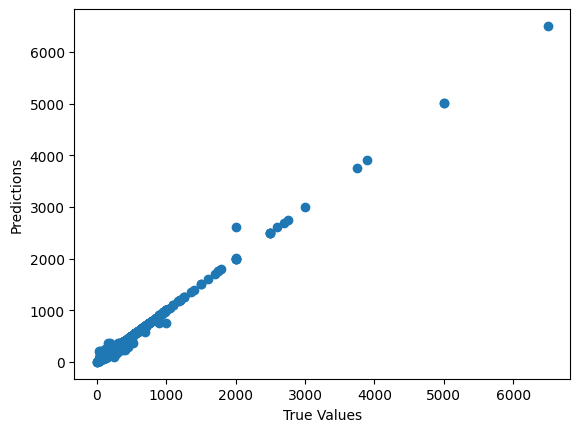

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Correlation within variables:")
print(airbnb_dataset_2_encoded.corr())

# Choose columns to be used in the model
data = airbnb_dataset_2_encoded[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'neighbourhood_encoded', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'name_encoded']]

# Dependent variable to predict
target = airbnb_dataset_2_encoded['price']

# Divide dataset
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Create instance of linear regression object
regression_model = LinearRegression()

# Train model using train data
regression_model.fit(X=data_train, y=target_train)

# Make predictions using test data
target_pred = regression_model.predict(data_test)

# Calculate the root mean square error and the coefficient of determination.
mse = mean_squared_error(target_test, target_pred)
r2 = r2_score(target_test, target_pred)

# Print results
print('Intercept:', regression_model.intercept_)
print('Coefficients:', regression_model.coef_)
print('Mean squared error:', mse)
print('Coefficient of determination:', r2)

# Graphic results
plt.scatter(target_test, target_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()